In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [2]:
print(f"{X_train.max()=}, {X_train.min()=}")

X_train.max()=255, X_train.min()=0


# Normalize data

$$X' = \frac{X}{X_{max}}$$

In [3]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

print(f"{X_train.max()=}, {X_train.min()=}")

X_train.max()=1.0, X_train.min()=0.0


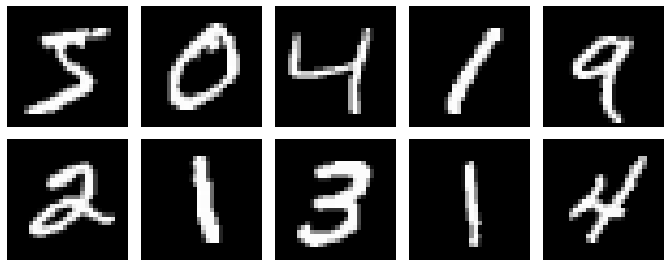

In [19]:
def display_images(data, nrows = 2, ncols = 5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap = "gray")
        ax.axis("off")

    fig.subplots_adjust(wspace = 0, hspace = .1, bottom = 0)

display_images(X_train)

## MLP

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes = None, names = None, activations = []):
    model = Sequential(name = "mlp_model")
    model.add(Flatten(input_shape = (28, 28), name = "input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))

    
        
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return model

#model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations = ["softmax"])

#model_1.summary()

In [6]:
#model_1.fit(X_train, y_train, validation_split = 1/6, epochs = 20, verbose = 1)

In [7]:
#metrics = pd.DataFrame(model_1.history.history)

#metrics.index = range(len(metrics))

#metrics.head()

In [8]:
def plot_metrics(df_history, style = "-o"):
    _, axes = plt.subplots(1, 2, figsize = (12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, col in zip(axes, columns):
        df_history.plot(y = col, xlabel = "Epochs", ylabel = col[0], ax = ax, style = style)

        ax.grid()

#plot_metrics(metrics)

## Hidden layers

In [9]:
model_2 = MLP_model(nodes = [128, 128, 10], activations = ["relu", "relu", "softmax"], names = ["hidden1", "hidden2", "output"])

model_2.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "mlp_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 hidden2 (Dense)             (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


2022-04-21 11:14:14.208863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-21 11:14:14.208975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model_2.fit(X_train, y_train, validation_split = 1/6, epochs = 8, verbose = 1)

Epoch 1/8
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0341 - accuracy: 0.9885 - val_loss: 0.0939 - val_accuracy: 0.9754
Epoch 2/8
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0287 - accuracy: 0.9901 - val_loss: 0.0976 - val_accuracy: 0.9764
Epoch 3/8
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.1101 - val_accuracy: 0.9758
Epoch 4/8
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.1085 - val_accuracy: 0.9752
Epoch 5/8
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0211 - accuracy: 0.9928 - val_loss: 0.0983 - val_accuracy: 0.9773
Epoch 6/8
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.1054 - val_accuracy: 0.9771
Epoch 7/8
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 0.1165 - val_accuracy: 0.9746

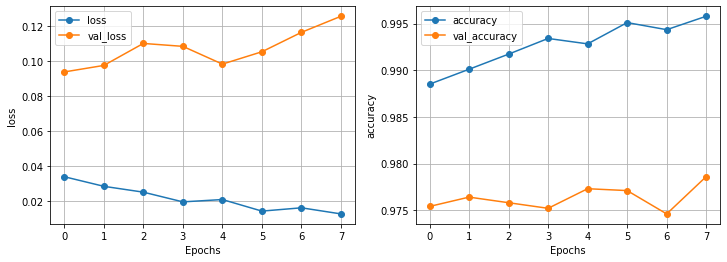

In [12]:
metrics = pd.DataFrame(model_2.history.history)

metrics.index = range(len(metrics))

plot_metrics(metrics)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_2.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

#print(classification_report(y_test, y_pred))
#cm = confusion_matrix(y_test, y_pred)
#ConfusionMatrixDisplay(cm).plot()

2022-04-21 11:16:59.193631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]

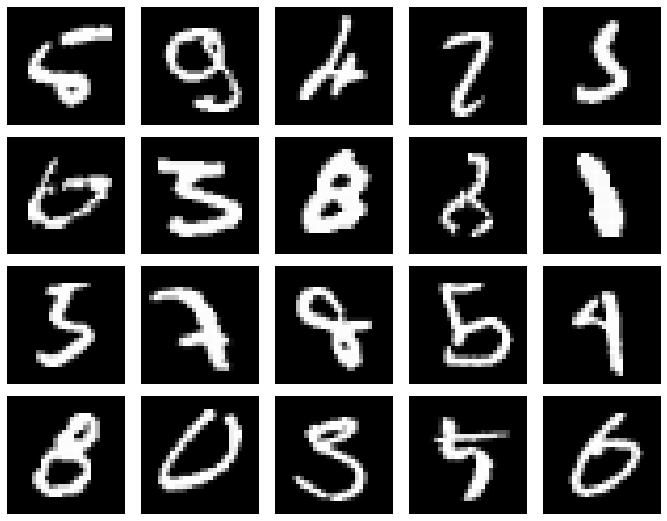

In [20]:

# a few misclassifications
display_images(misclassified_samples, 4,5, (12,8))